In [ ]:
pip install --upgrade shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 6.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_excel('/content/energy.xlsx')

In [ ]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df.iloc[:, :-2]  # Features
y = df.iloc[:, -2]   # Target: Heating Load (Y1) or Cooling Load (Y2)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for better readability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


### visulaization

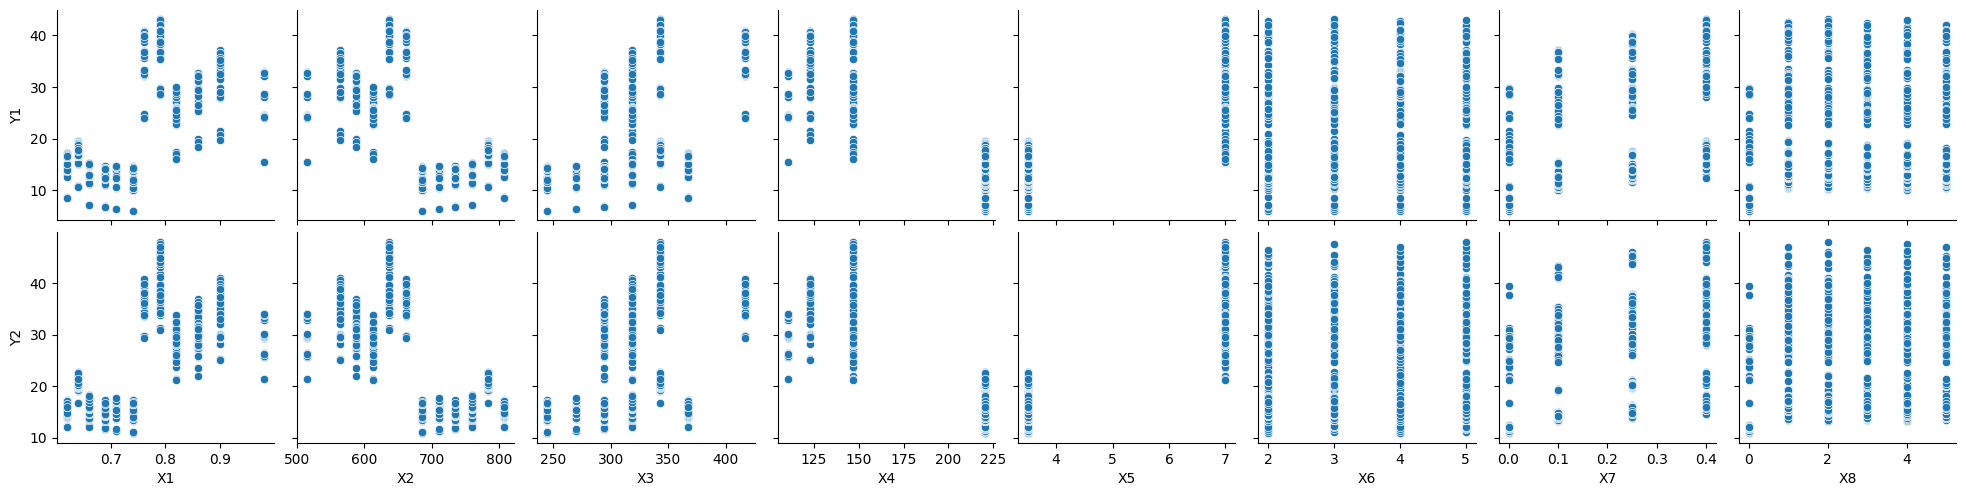

In [ ]:
sns.pairplot(df,x_vars=df.columns[:-2],y_vars=['Y1','Y2'], diag_kind='auto')

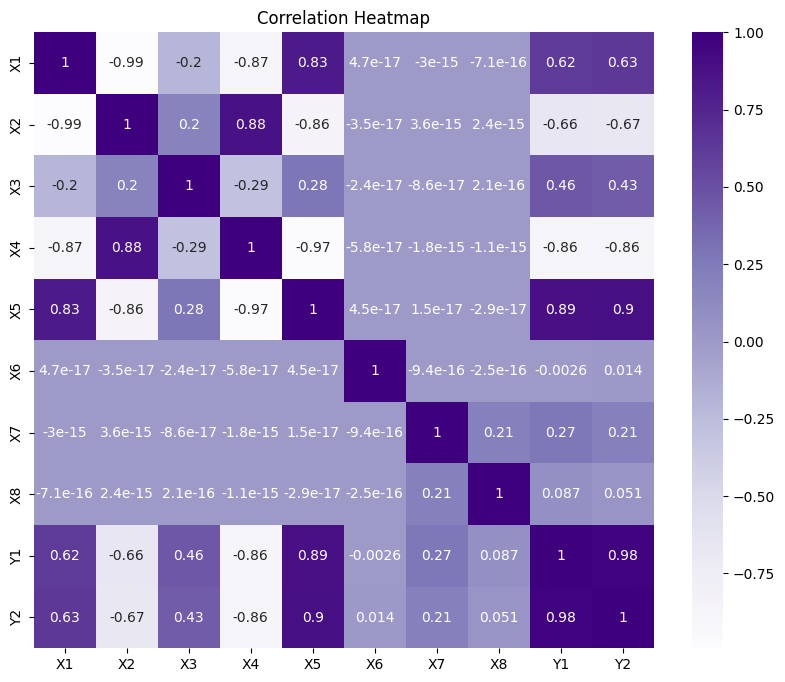

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Purples', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Feature Selection

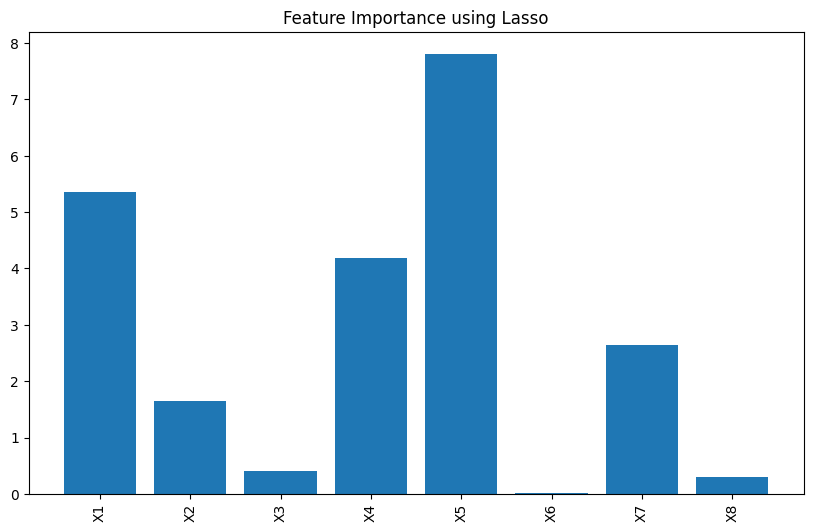

In [ ]:


# Recursive Feature Elimination (RFE)
model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X_scaled, y)

# Lasso Regularization
lasso = LassoCV()
lasso.fit(X_scaled, y)
importance = np.abs(lasso.coef_)

# Feature importance visualization
plt.figure(figsize=(10, 6))
plt.bar(X.columns, importance)
plt.title('Feature Importance using Lasso')
plt.xticks(rotation=90)
plt.show()


## Model Training

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)




In [ ]:
# XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Model Evaluation

In [ ]:


# Cross-validation
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')


print(f'XGBoost CV R2: {xgb_scores.mean()}')


# Model Evaluation on Test Set
y_pred_xgb = xgb_model.predict(X_test)


print(f'XGBoost Test R2: {r2_score(y_test, y_pred_xgb)}')


print(f'XGBoost Test MSE: {mean_squared_error(y_test, y_pred_xgb)}')



XGBoost CV R2: 0.9984036399584324
XGBoost Test R2: 0.9984079461915704
XGBoost Test MSE: 0.1659436041589458


In [ ]:
# prompt: generate accuracy of both the models

xgb_accuracy = r2_score(y_test, y_pred_xgb) * 100
print(f'XGBoost Accuracy: {xgb_accuracy:.2f}%')



XGBoost Accuracy: 99.84%


In [ ]:
print(X_test)

           X1        X2        X3        X4   X5        X6        X7        X8
668 -1.363812  1.553943  1.123903  0.972512 -1.0 -1.341641  1.244049  0.120972
324 -0.985413  0.997307  0.000000  0.972512 -1.0 -1.341641  0.117363 -1.169393
624  2.041777 -1.785875 -0.561951 -1.470077  1.0 -1.341641  1.244049  0.120972
690  0.244383 -0.394284  0.561951 -0.655880  1.0  0.447214  1.244049  0.766154
473 -1.174613  1.275625  0.561951  0.972512 -1.0 -0.447214  0.117363  0.766154
..        ...       ...       ...       ...  ...       ...       ...       ...
355  0.244383 -0.394284  0.561951 -0.655880  1.0  1.341641  0.117363 -0.524211
534  1.284979 -1.229239  0.000000 -1.198678  1.0  0.447214  1.244049 -1.169393
344  0.906580 -0.950920 -0.561951 -0.655880  1.0 -1.341641  0.117363 -0.524211
296  0.906580 -0.950920 -0.561951 -0.655880  1.0 -1.341641  0.117363 -1.169393
462 -0.512415  0.440670 -1.123903  0.972512 -1.0  0.447214  0.117363  0.766154

[154 rows x 8 columns]


## Model Interperability

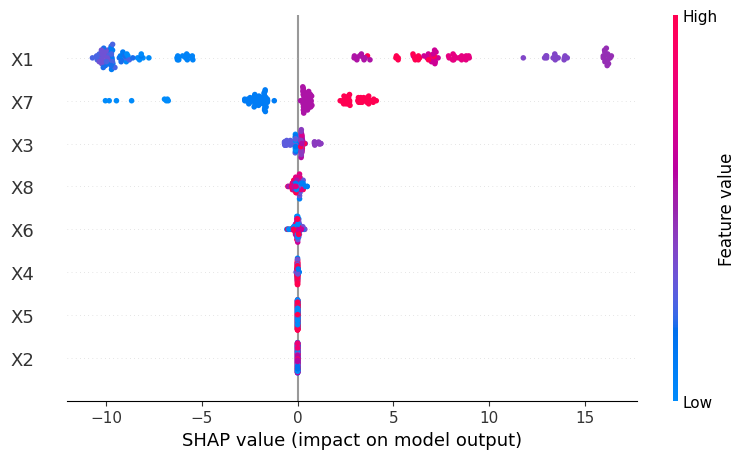

In [ ]:
import shap

# SHAP for XGBoost
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)





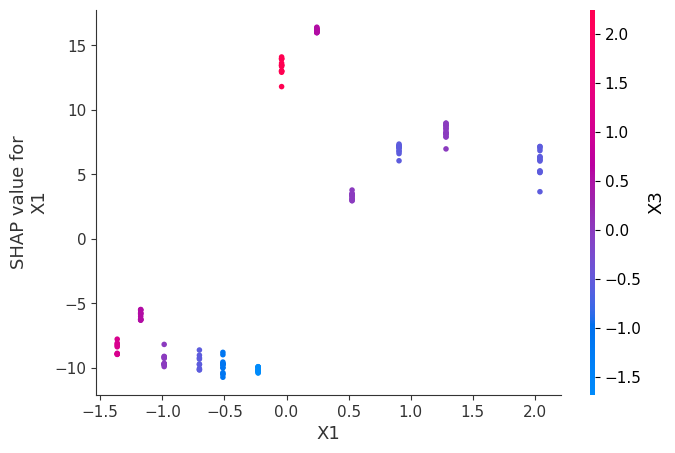

In [ ]:
# Dependence plot for a specific feature
shap_valuesArray = shap_values.values # Convert to NumPy array
shap.dependence_plot('X1', shap_valuesArray, X_test)

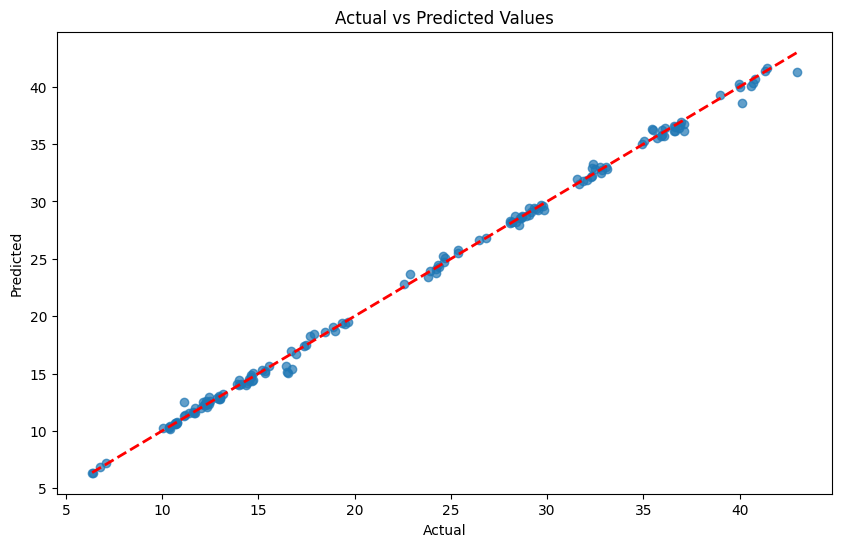

In [ ]:
# Advanced Visualizations (Example)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()